Handwritten Digit Recognition is a classic problem in Machine Learning and Computer Vision. It involves recognizing digits from 0 through 9 from images or scanned documents. This project does this task through Neural Networks.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical

The dataset used contains 42,000 rows where each row represents an image.
First column (label) indicated the digit (0-9) and the remaining columns represent the pixel values of the image.
These pixels are separated into x (pixel values) and y (labels).
x has 42,000 samples with 784 features (28x28 pixels), and y has 42,000 labels

In [11]:
train_data = pd.read_csv("data/Train.csv")
print("Shape of train_data:", train_data.shape)

X = train_data.iloc[:, 1:] # Get pixel values
y = train_data.iloc[:, 0] # Get labels

print("Shape of X after separating features:", X.shape)

Shape of train_data: (42000, 785)
Shape of X after separating features: (42000, 784)


We can see that the shape of X has one less feature then the train data. We will now preprocess the data.
We will do the following:
- Ensure X is in the correct format, i.e. Pandas DataFrame.
- Convert all pixel values to numeric format and replace any missing values with 0.
- Normalize the pixel values to [0,1] by dividing them by 255.0. This optimizes the model learning.
- Reshape the data to include a channel dimension making it compatible with NNs.

In [12]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


Neural networks work best labels follow the one-hot encoding format. It's essentially a way to convert categorical data into numerical form so models can process it correctly. (e.g. if categorical variable is Color = {Red, Blue, Green}, we assign it to 1 if the category is one of the colors, and all of the remaining colors to 0). We will tag divide it into 10 classes (i.e. numbers 0 through 9).

In [13]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


Now, we will split the data! 80% of the data will be used for training, and the rest for test.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


Now, we will build the Neural Network Model!
We will do a feedforward neural network with 3 layers.
Flatten will convert a 28x28 image into a single vector of length 784.
Two hidden layers with 128 and 64 neuros use the ReLU actvation to introduce non-linearity.
Outputlayer with 10 neurons uses the softmax to predict probabilities for each digit 0 through 9.
Compile the model using Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.

In [15]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Now, we train the model! The model trains for 10 iterations over the entire training dataset. During training it processes the data in batches of 32 samples for efficiency.

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9115 - loss: 0.3050 - val_accuracy: 0.9519 - val_loss: 0.1640
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.9612 - loss: 0.1279 - val_accuracy: 0.9629 - val_loss: 0.1276
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.9730 - loss: 0.0876 - val_accuracy: 0.9637 - val_loss: 0.1150
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 0.9640 - val_loss: 0.1149
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.9836 - loss: 0.0506 - val_accuracy: 0.9674 - val_loss: 0.1115
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.9867 - loss: 0.0409 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9673 - val_loss: 0.1180
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.9910 - l

Now, we can evaluate the model's performance, based on the validation set and plot the training and validation accuracy to see how well the model learned over time. This helps us identify possible overfitting.

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9713 - loss: 0.1223 
Validation Accuracy: 97.13%


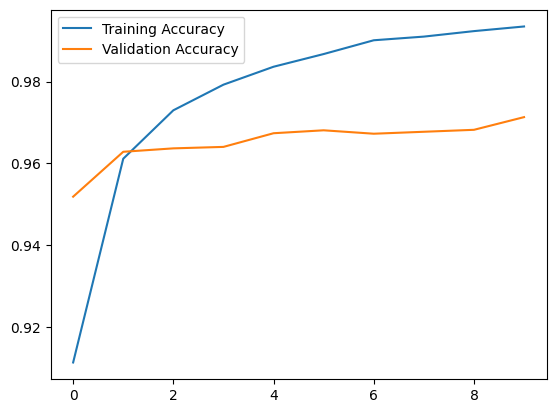

In [17]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

By the end of the training, the model reaches a training and validation accuracy of around 96 to 97%! This shows that the model performs well on both training and validation data. Now, we can make predictions on new data!

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


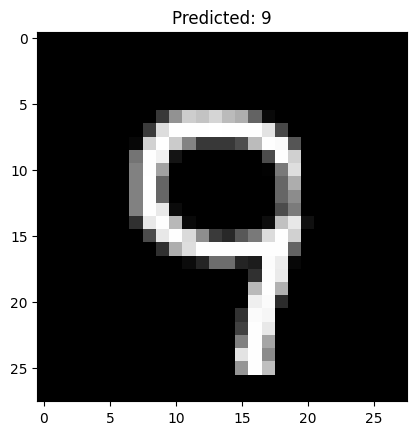

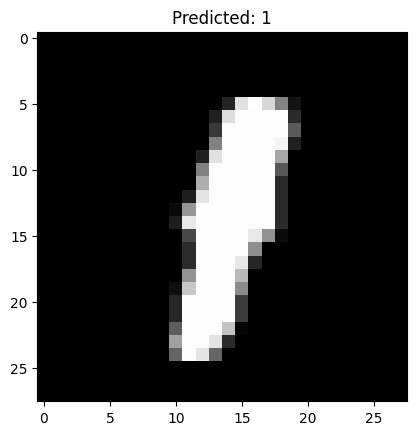

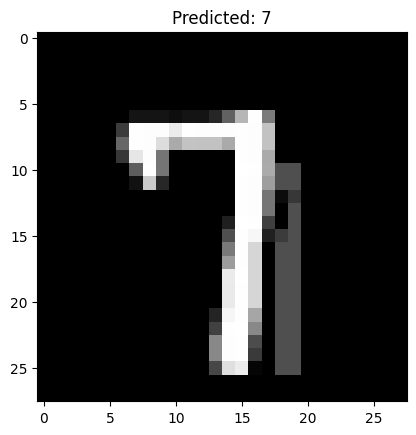

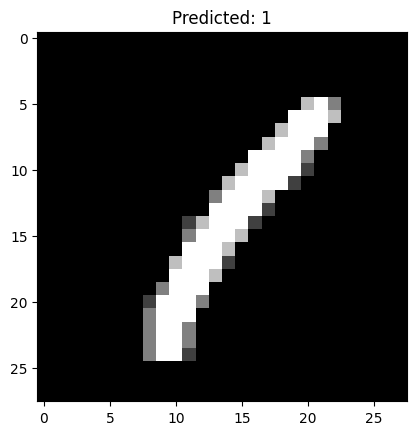

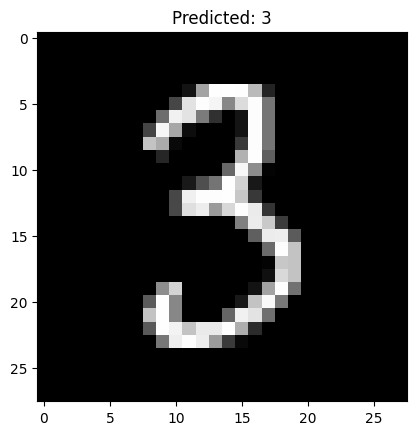

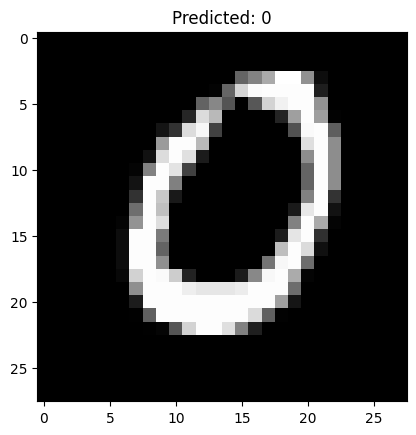

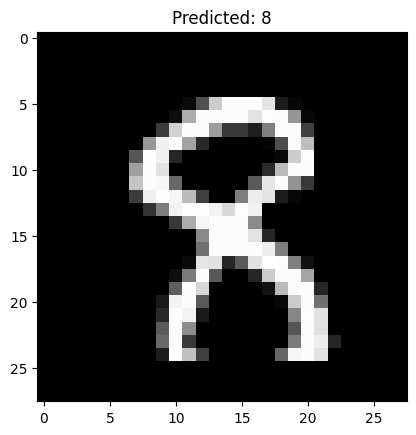

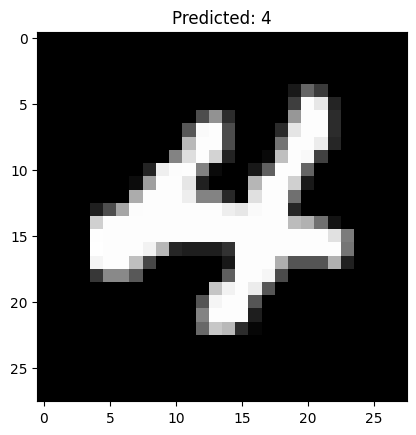

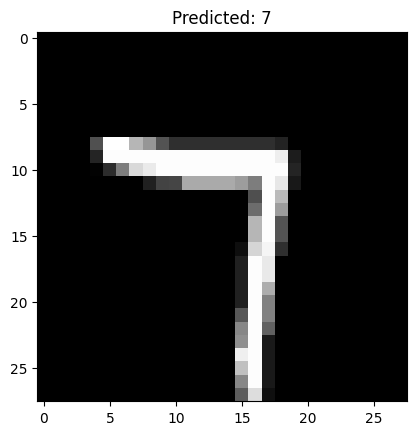

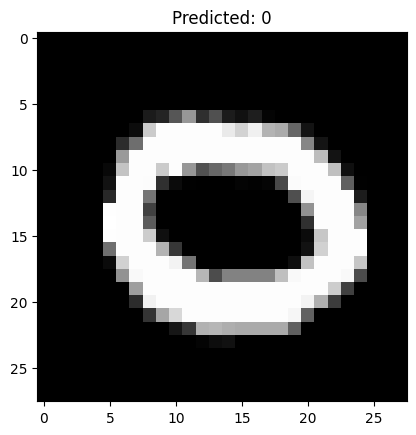

In [20]:
test_data = pd.read_csv("data/test.csv")
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.show()